<a href="https://colab.research.google.com/github/YLiu-101/California-Housing-Reg/blob/main/California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Importing

In [82]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# California Housing Predictions

Credits: 
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition

by Aurélien Géron

Released September 2019

Publisher(s): O'Reilly Media, Inc.

ISBN: 9781492032649

In [3]:
# ! pip install scikit-learn
! pip install kaggle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download camnugent/california-housing-prices
! unzip california-housing-prices.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 82.7MB/s]
Archive:  california-housing-prices.zip
  inflating: housing.csv             


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data = pd.read_csv("/content/housing.csv")
data1 = pd.read_csv("/content/housing.csv")
data = pd.concat([data,data1])
data.head() # Gives us the top 5 rows in this dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploring the Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41280 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           41280 non-null  float64
 1   latitude            41280 non-null  float64
 2   housing_median_age  41280 non-null  float64
 3   total_rooms         41280 non-null  float64
 4   total_bedrooms      40866 non-null  float64
 5   population          41280 non-null  float64
 6   households          41280 non-null  float64
 7   median_income       41280 non-null  float64
 8   median_house_value  41280 non-null  float64
 9   ocean_proximity     41280 non-null  object 
dtypes: float64(9), object(1)
memory usage: 3.5+ MB


In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,41280.000000,41280.000000,41280.000000,41280.000000,40866.000000,41280.000000,41280.000000,41280.000000,41280.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003507,2.135927,12.585405,2181.588826,421.379914,1132.448405,382.325122,1.899799,115394.218114
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98542e3350>,
      dtype=object)

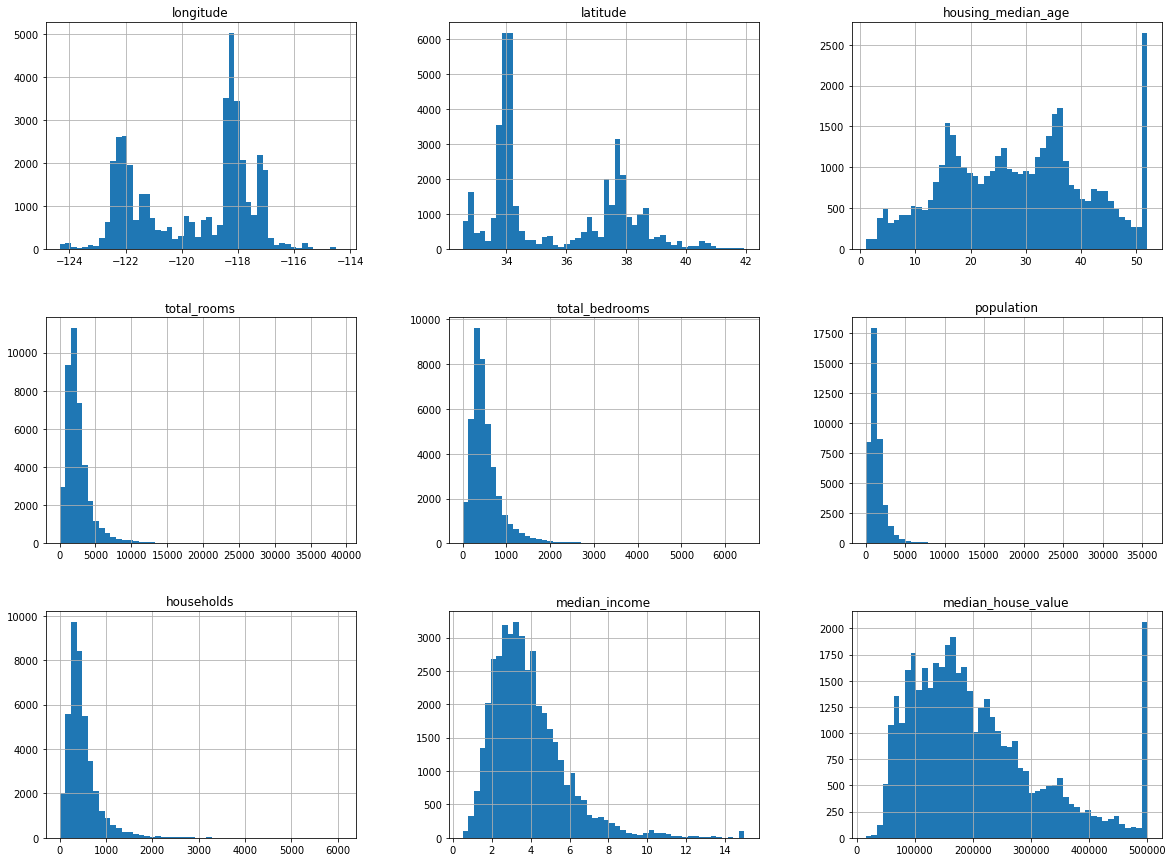

In [10]:
data.hist(bins=50,figsize=(20,15))

# Note - Most of these graphs are skewed left, and have a long right tail. We'll normalize these later


### Test Data

In [11]:
def train_test_split1(data,test_ratio): #Just a look at the inner workings of one
  shuffled_indices = np.random.permutation(data)
  test_size = int(len(data)*test_ratio)
  test_data = shuffled_indices[:test_size]
  train_data = shuffled_indices[test_size:]
  return data.iloc[train_data], data.iloc[test_data]

train_set,test_set = train_test_split(data, test_size = 0.2, random_state = 42)


While randomness is good and all, it may not give the test set representative data. This is because, say that the US population has 35% people who read constantly and 65% who do not. 

When a newspaper wants to sample the population about their reading preferences, they probably want 35% to be consistent readers in their sample.

<generator object BaseShuffleSplit.split at 0x7f9853a61f50> what
[  160 12556 23380 ... 22352 15170 34973]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9853a6d4d0>,
      dtype=object)

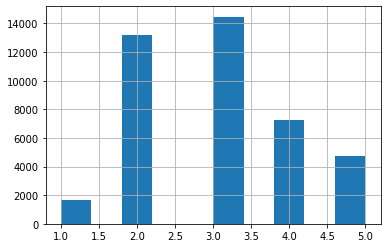

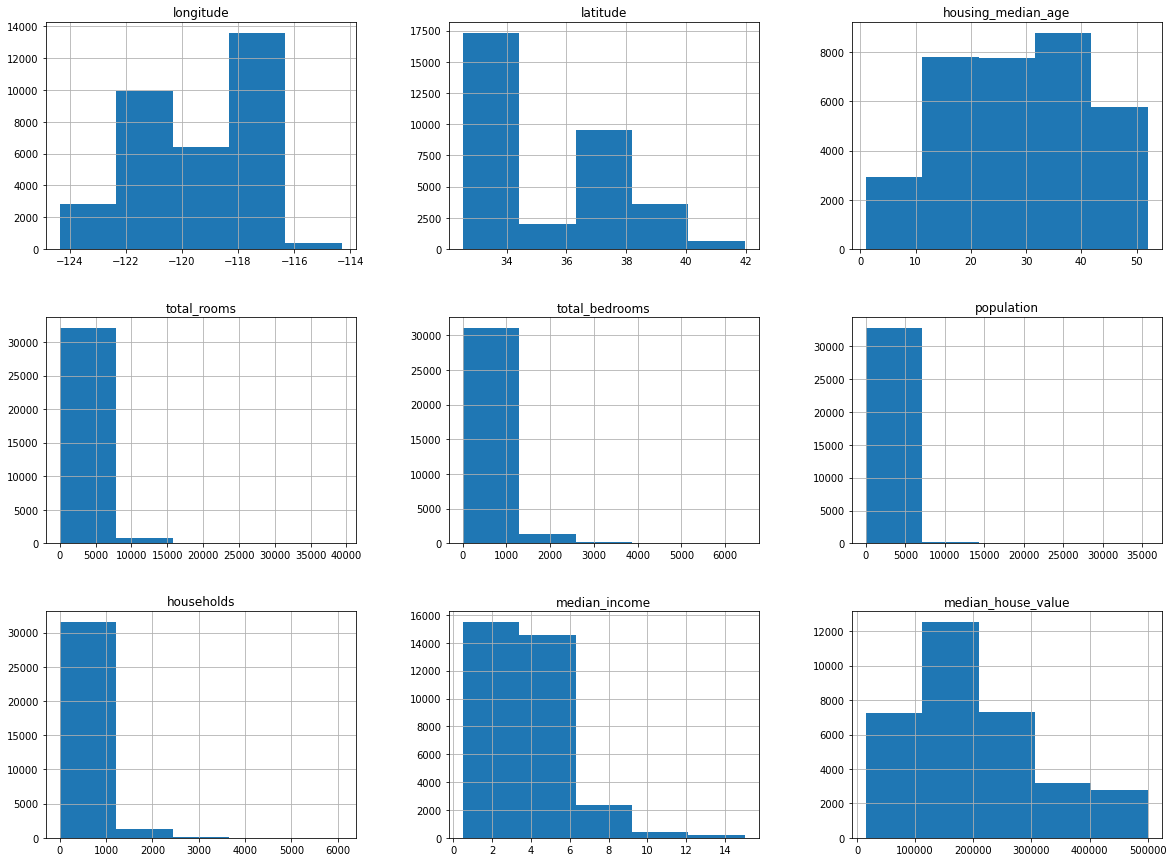

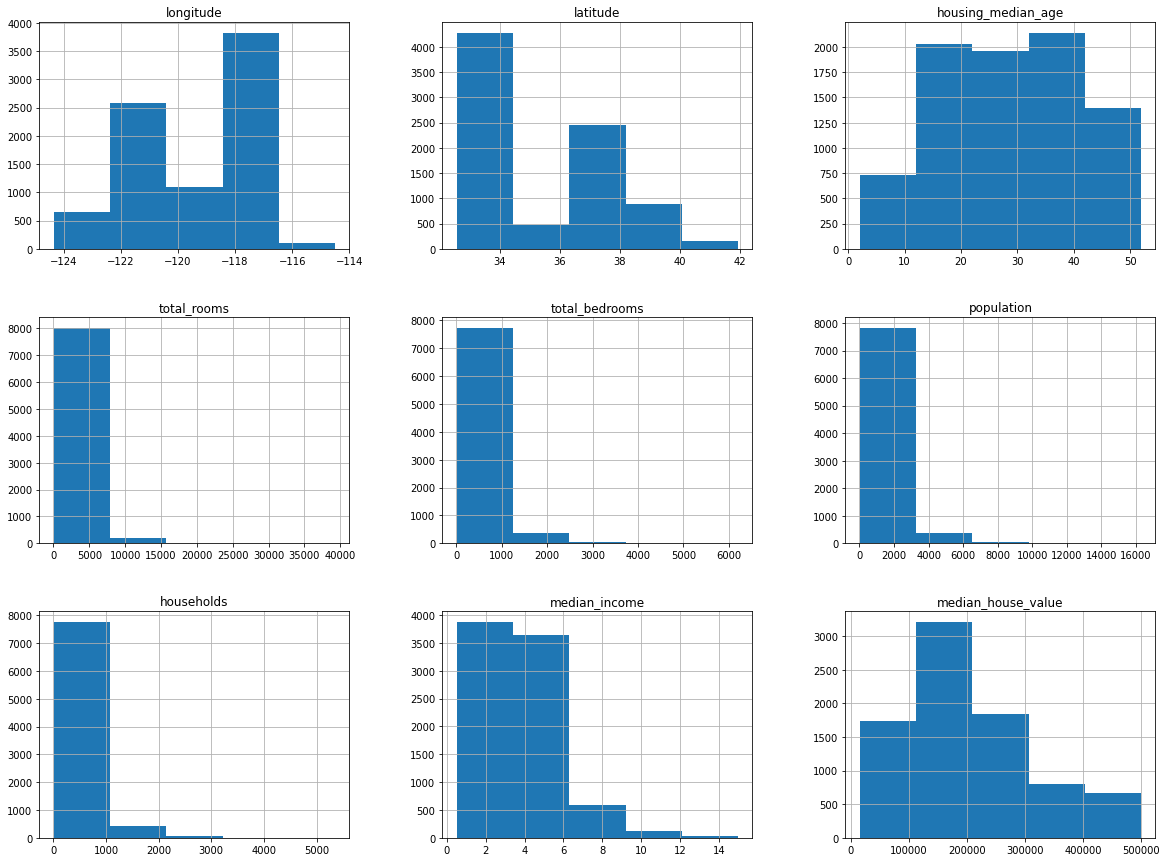

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

data['income_cat'] = pd.cut(data['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

data['income_cat'].hist() #We want to have equal representation for each category

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
print(split.split(data, data["income_cat"]),"what")
for train_index, test_index in split.split(data, data["income_cat"]):
  print(train_index)
  strat_train_set = data.iloc[train_index]
  strat_test_set = data.iloc[test_index]


# Plotting the two shows that Median income histograms are pretty similar
strat_train_set.hist(bins=5,figsize=(20,15))
strat_test_set.hist(bins=5,figsize=(20,15))


Now we split the stratified training and testing into x and y labels respectively.

In [13]:
strat_train_set_labels = strat_train_set.loc[:,"median_house_value"]
strat_train_set_x = strat_train_set.drop(["median_house_value","income_cat"],axis=1)

strat_test_set_labels = strat_test_set.loc[:,"median_house_value"]
strat_test_set_x = strat_test_set.drop(["median_house_value","income_cat"],axis=1)



## Data Visualization

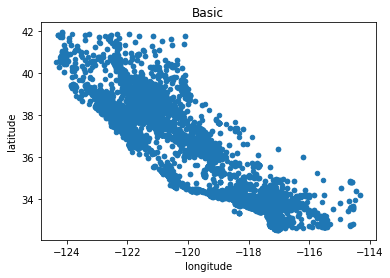

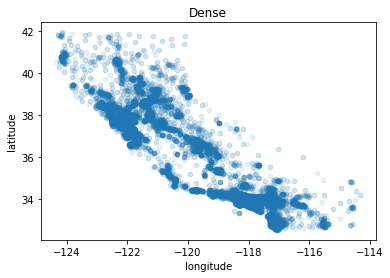

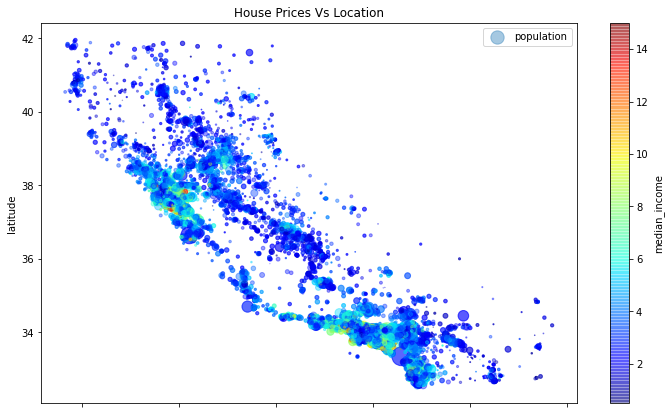

In [14]:
data_copy = strat_train_set.copy()
data_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, title ="House Prices Vs Location",
 s=data_copy["population"]/100, # The size of each point
  label="population",  # The label of the points
  figsize=(12,7), # Size of entire figure
  c="median_income", # The column to look at for coloring
  cmap=plt.get_cmap("jet"),  # 
  colorbar=True, #Creates a color bar
)
plt.legend()

### Data Correlations

In [15]:
corr_matrix = data_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690571
total_rooms           0.129853
housing_median_age    0.106744
households            0.062120
total_bedrooms        0.045501
population           -0.027849
longitude            -0.044901
latitude             -0.145307
Name: median_house_value, dtype: float64

The issue with linear correlations is that it assumes that the data relations are linear. Thus, plotting it will give us more insight into the data at hand. 

Notice that the main diagonal is not full of straight lines.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98529876d0>,
      dtype=object)

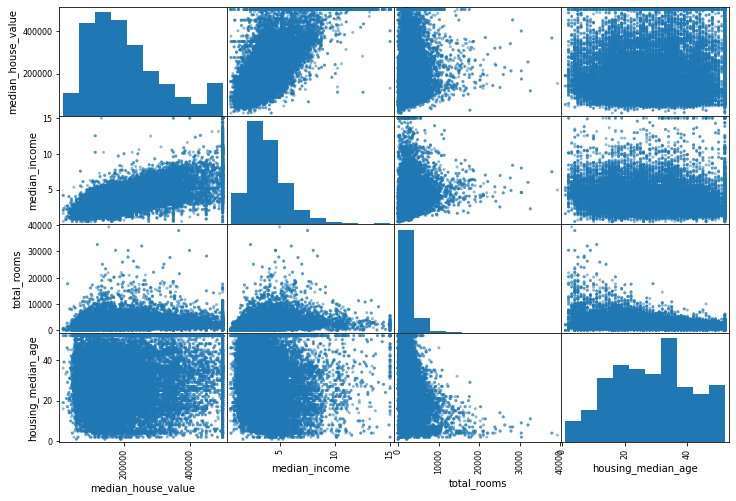

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(data_copy[attributes], figsize=(12, 8))

Plotting median income vs median house value reveals some strange patterns.

For one, there is a long vertical line on the top, so our data caps median house value at a certain point. 

Second, there are a few horizontal lines, such as those between $3*10^5$ and $4*10^5$. 

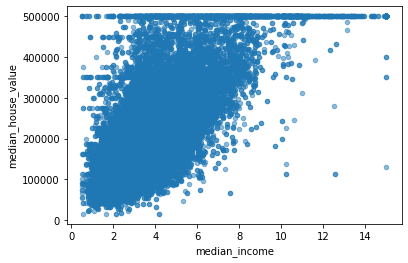

In [17]:
data_copy.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.5)




#### Attribute Combinations

Looking through the dataset, we need to make a few assumptions. First, the total number of rooms in a district likely isn't too important. Instead, it's the number of rooms per house.

In [18]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Data Processing

In [19]:
data_copy.dropna(subset=["total_bedrooms"]) # option 1
data_copy.drop("total_bedrooms", axis=1) # option 2
median = data_copy["total_bedrooms"].median() # option 3
data_copy["total_bedrooms"].fillna(median, inplace=True)


Scikit learn also has a built-in imputer which fills in the data for you

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
data_copy1=data_copy.drop("ocean_proximity",axis=1)

imputer.fit(data_copy1)
print(imputer.statistics_) # These two
print(data_copy.median().values) # Do the same things

[-1.1849e+02  3.4250e+01  2.9000e+01  2.1170e+03  4.3200e+02  1.1600e+03
  4.0700e+02  3.5385e+00  1.7950e+05  3.0000e+00]
[-1.1849e+02  3.4250e+01  2.9000e+01  2.1170e+03  4.3200e+02  1.1600e+03
  4.0700e+02  3.5385e+00  1.7950e+05]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Now let's replace all missing values with the median of the corresponding column. For our convenience, there is a built-in function for that. 

In [21]:
x = imputer.fit_transform(data_copy1) # If we write this code, we don't need the fit function first
data_copy1 = pd.DataFrame(x, columns = data_copy1.columns)
data_copy1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-122.24,37.80,52.0,888.0,168.0,360.0,175.0,2.1944,211500.0,2.0
1,-121.47,38.55,24.0,979.0,287.0,546.0,291.0,1.1860,67000.0,1.0
2,-115.56,32.78,29.0,1568.0,283.0,848.0,245.0,3.1597,76200.0,3.0
3,-118.38,34.04,45.0,767.0,130.0,254.0,118.0,6.2895,340400.0,5.0
4,-122.49,37.76,52.0,1382.0,230.0,708.0,279.0,5.8096,339800.0,4.0
...,...,...,...,...,...,...,...,...,...,...
33019,-121.91,37.26,32.0,3776.0,620.0,1790.0,612.0,5.4675,261100.0,4.0
33020,-117.13,32.92,16.0,1580.0,241.0,917.0,261.0,4.7266,191100.0,4.0
33021,-122.32,37.97,29.0,2347.0,464.0,1135.0,490.0,3.9722,161000.0,3.0
33022,-117.07,33.01,25.0,2120.0,381.0,588.0,359.0,3.1187,169400.0,3.0


### Dealing With Text/Categorical Data

In [22]:
data_ocean = data[["ocean_proximity"]]
data_ocean

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [23]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data_ocean=ord_enc.fit_transform(data_ocean)
data_ocean.size

41280

In [24]:
data_ocean

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [25]:
ord_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a one-hot encoder. It generates a sparse matrix, so it stores much less memory than an np array (only stores location of nonzero values)

In [26]:
from sklearn.preprocessing import OneHotEncoder

hot = OneHotEncoder()
one_hot = hot.fit_transform(data_ocean)
hot.categories_


[array([0., 1., 2., 3., 4.])]

### Feature Scaling

The min max method scales down all the numbers in the data frame between 0 and 1 inclusive. It does this by subtracting the min from it, then dividing by max-min

In [27]:
from sklearn.preprocessing import MinMaxScaler
manx = MinMaxScaler()
all_col = data.columns
copy1_col = data_copy1.columns
data_copy1 = manx.fit_transform(data_copy1)
data_copy1 = pd.DataFrame(data_copy1,columns=copy1_col)
data_copy1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,0.210159,0.558980,1.000000,0.022534,0.025916,0.010006,0.028614,0.116860,0.405155,0.25
1,0.286853,0.638682,0.450980,0.024849,0.044382,0.015219,0.047690,0.047317,0.107218,0.00
2,0.875498,0.025505,0.549020,0.039829,0.043762,0.023683,0.040125,0.183432,0.126187,0.50
3,0.594622,0.159405,0.862745,0.019457,0.020019,0.007035,0.019240,0.399277,0.670927,1.00
4,0.185259,0.554729,1.000000,0.035098,0.035537,0.019760,0.045716,0.366181,0.669690,0.75
...,...,...,...,...,...,...,...,...,...,...
33019,0.243028,0.501594,0.607843,0.095987,0.096058,0.050085,0.100477,0.342588,0.507423,0.75
33020,0.719124,0.040383,0.294118,0.040134,0.037244,0.025617,0.042756,0.291493,0.363093,0.75
33021,0.202191,0.577046,0.549020,0.059642,0.071850,0.031727,0.080414,0.239466,0.301032,0.50
33022,0.725100,0.049947,0.470588,0.053868,0.058970,0.016396,0.058872,0.180604,0.318351,0.50


In [28]:
data_copy1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,0.210159,0.558980,1.000000,0.022534,0.025916,0.010006,0.028614,0.116860,0.405155,0.25
1,0.286853,0.638682,0.450980,0.024849,0.044382,0.015219,0.047690,0.047317,0.107218,0.00
2,0.875498,0.025505,0.549020,0.039829,0.043762,0.023683,0.040125,0.183432,0.126187,0.50
3,0.594622,0.159405,0.862745,0.019457,0.020019,0.007035,0.019240,0.399277,0.670927,1.00
4,0.185259,0.554729,1.000000,0.035098,0.035537,0.019760,0.045716,0.366181,0.669690,0.75
...,...,...,...,...,...,...,...,...,...,...
33019,0.243028,0.501594,0.607843,0.095987,0.096058,0.050085,0.100477,0.342588,0.507423,0.75
33020,0.719124,0.040383,0.294118,0.040134,0.037244,0.025617,0.042756,0.291493,0.363093,0.75
33021,0.202191,0.577046,0.549020,0.059642,0.071850,0.031727,0.080414,0.239466,0.301032,0.50
33022,0.725100,0.049947,0.470588,0.053868,0.058970,0.016396,0.058872,0.180604,0.318351,0.50


In [29]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
data_copy1 = scal.fit_transform(data_copy1)

data_copy1 = pd.DataFrame(data_copy1,columns = copy1_col)
data_copy1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-1.336711,1.016852,1.852423,-0.793078,-0.872093,-0.926473,-0.842335,-0.880065,0.039474,-0.954571
1,-0.952119,1.367942,-0.372468,-0.751708,-0.590014,-0.764492,-0.540428,-1.408744,-1.208606,-1.902826
2,1.999743,-1.333113,0.024834,-0.483940,-0.599495,-0.501491,-0.660150,-0.373982,-1.129143,-0.006317
3,0.591240,-0.743281,1.296200,-0.848086,-0.962169,-1.018784,-0.990686,1.266894,1.152814,1.890192
4,-1.461578,0.998127,1.852423,-0.568498,-0.725127,-0.623412,-0.571660,1.015295,1.147631,0.941937
...,...,...,...,...,...,...,...,...,...,...
33019,-1.171886,0.764067,0.263215,0.519849,0.199335,0.318863,0.295022,0.835940,0.467881,0.941937
33020,1.215576,-1.267576,-1.008151,-0.478485,-0.699053,-0.441401,-0.618508,0.447504,-0.136725,0.941937
33021,-1.376668,1.096433,0.024834,-0.129795,-0.170450,-0.251553,-0.022501,0.051991,-0.396706,-0.006317
33022,1.245544,-1.225446,-0.293008,-0.232993,-0.367195,-0.727916,-0.363448,-0.395478,-0.324153,-0.006317


### Tranformation Pipelines

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
 ('imputer1', SimpleImputer(strategy="median")),
 ('manx',MinMaxScaler()),
 ('std_scaler', StandardScaler()),
 ])
data_copy1 = pipe.fit_transform(data_copy1)

data_copy1

array([[-1.33671054,  1.01685206,  1.85242292, ..., -0.8800653 ,
         0.03947444, -0.95457149],
       [-0.95211937,  1.3679425 , -0.37246821, ..., -1.40874444,
        -1.20860576, -1.90282589],
       [ 1.99974269, -1.33311327,  0.02483378, ..., -0.37398241,
        -1.12914321, -0.0063171 ],
       ...,
       [-1.37666806,  1.09643256,  0.02483378, ...,  0.05199121,
        -0.39670583, -0.0063171 ],
       [ 1.24554443, -1.22544554, -0.29300781, ..., -0.3954777 ,
        -0.32415307, -0.0063171 ],
       [ 1.20059222, -1.3565193 ,  1.85242292, ..., -1.00311269,
        -0.05985374, -0.95457149]])

That's great and all, but it only processes numbers. Let's create a pipeline that is able to handle both categorical and numeric information. Note that the data also contains the added columns

In [31]:
strat_train_set_x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
160,-122.24,37.80,52.0,888.0,168.0,360.0,175.0,2.1944,NEAR BAY
12556,-121.47,38.55,24.0,979.0,287.0,546.0,291.0,1.1860,INLAND
2740,-115.56,32.78,29.0,1568.0,283.0,848.0,245.0,3.1597,INLAND
5372,-118.38,34.04,45.0,767.0,130.0,254.0,118.0,6.2895,<1H OCEAN
16055,-122.49,37.76,52.0,1382.0,230.0,708.0,279.0,5.8096,NEAR BAY
...,...,...,...,...,...,...,...,...,...
17646,-121.91,37.26,32.0,3776.0,620.0,1790.0,612.0,5.4675,<1H OCEAN
14530,-117.13,32.92,16.0,1580.0,241.0,917.0,261.0,4.7266,<1H OCEAN
1712,-122.32,37.97,29.0,2347.0,464.0,1135.0,490.0,3.9722,NEAR BAY
15170,-117.07,33.01,25.0,2120.0,381.0,588.0,359.0,3.1187,<1H OCEAN


In [32]:
list(strat_train_set_x.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [33]:
from sklearn.compose import ColumnTransformer

full_pipe = ColumnTransformer([
    ("num", pipe, strat_train_set_x.columns[:-1]), # This handles the numeric data
    ("cat", OneHotEncoder(),["ocean_proximity"]) # This handles the categorical data
])
x_col = list(strat_train_set_x.columns)
for i in range(4):
  x_col.append("ocean_proximity" + str(i+2))


strat_train_set_x = full_pipe.fit_transform(strat_train_set_x)
strat_train_set_x = pd.DataFrame(strat_train_set_x,columns = x_col)
strat_train_set_x

strat_test_set_x = full_pipe.fit_transform(strat_test_set_x)
strat_test_set_x = pd.DataFrame(strat_test_set_x,columns = x_col)
strat_test_set_x


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
0,0.803283,-0.875150,0.202818,0.083610,0.013350,0.446285,0.159864,0.063444,1.0,0.0,0.0,0.0,0.0
1,0.619086,-0.725240,-0.830166,0.692850,1.858066,0.629099,1.636151,-0.821969,1.0,0.0,0.0,0.0,0.0
2,0.793326,-0.926682,0.441199,0.504479,0.308994,0.083470,0.344066,0.508986,1.0,0.0,0.0,0.0,0.0
3,1.221458,-1.376411,1.871486,-0.877225,-0.555946,-0.089032,-0.590292,-1.231610,0.0,0.0,0.0,0.0,1.0
4,1.569938,-0.804880,-0.909627,1.254642,1.772549,-0.216533,0.255969,-1.164460,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,0.848087,-0.823619,-0.909627,-0.463948,-0.851589,-0.706849,-0.793182,4.949001,1.0,0.0,0.0,0.0,0.0
8252,0.290520,-0.134971,-0.353404,-0.335836,-0.138136,-0.145282,-0.181844,-1.500958,0.0,1.0,0.0,0.0,0.0
8253,-0.048003,0.380344,0.043898,-0.449238,-0.585266,-0.485597,-0.595632,-0.561129,0.0,1.0,0.0,0.0,0.0
8254,0.200911,-0.683078,0.520660,-0.023624,0.028010,1.213167,0.106472,-0.342451,0.0,0.0,0.0,0.0,1.0


## The Model

### Model Types

#### Linear Model

Not that great - the MSE and graphs show that our model is probably underfitting

In [34]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(strat_train_set_x,strat_train_set_labels)
pred = lin.predict(strat_train_set_x)
mse_arr = np.power((pred - strat_train_set_labels),2)
rmse = np.sqrt(np.sum(mse_arr)/strat_train_set_x.shape[0])
rmse

68894.53850234667

Now let's visualize how our model is fitting

In [35]:
strat_train_set_labels

160      211500.0
12556     67000.0
2740      76200.0
5372     340400.0
16055    339800.0
           ...   
17646    261100.0
14530    191100.0
1712     161000.0
15170    169400.0
14333    200000.0
Name: median_house_value, Length: 33024, dtype: float64

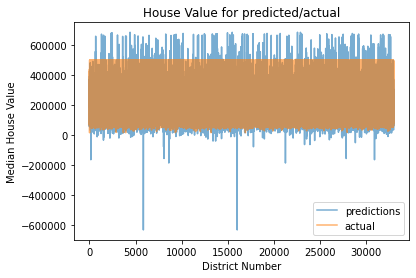

In [36]:
plt.plot(range(strat_train_set_labels.shape[0]),pred,alpha=0.6,label="predictions")
plt.plot(range(strat_train_set_labels.shape[0]),strat_train_set_labels,alpha=0.6,label = 'actual')
plt.title("House Value for predicted/actual")
plt.xlabel("District Number")
plt.ylabel("Median House Value")
plt.legend()

Median income is likely an important factor. Let's visualize the two graphs

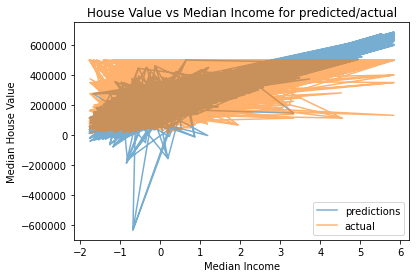

In [37]:
plt.plot(strat_train_set_x.loc[:,"median_income"],pred,alpha=0.6,label="predictions")
plt.plot(strat_train_set_x.loc[:,"median_income"],strat_train_set_labels,alpha=0.6,label = 'actual')
plt.title("House Value vs Median Income for predicted/actual")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

In the plot below, we have a high MSE in for low income values and it seems to be quite high for high income levels. This implies a possibly nonlinear relationship. A line can't seem to approximate these two extremes well.

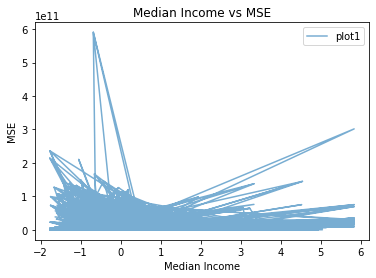

In [38]:
plt.plot(strat_train_set_x.loc[:,"median_income"],mse_arr,alpha=0.6,label="plot1")
plt.title("Median Income vs MSE")
plt.xlabel("Median Income")
plt.ylabel("MSE")
plt.legend()

#### Decision Trees

In [39]:
from sklearn.tree import DecisionTreeRegressor
dTree = DecisionTreeRegressor()
dTree.fit(strat_train_set_x,strat_train_set_labels)
tree_predictions = dTree.predict(strat_train_set_x)


In [40]:
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(tree_predictions,strat_train_set_labels)
tree_rmse = np.sqrt(tree_mse/strat_train_set_x.shape[0])
tree_rmse

0.0

Here we have an unusually low RMSE. This could mean that we have overfitted the data. Let's split the train set into a validation set and see if we have. (**spoiler**: it's a bad overfit)

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dTree, strat_train_set_x, strat_train_set_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores
def display_scores(score):
  print(score)
  print(score.mean())
  print(score.std())
display_scores(tree_rmse_scores)

[38357.28723226 35920.46414035 33890.88688092 33053.72376615
 36402.05062099 38598.41622428 35924.98692126 35739.45311523
 37789.00409562 35904.05283197]
36158.032582902706
1692.3047184763225


In [42]:
scores = cross_val_score(lin, strat_train_set_x, strat_train_set_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

[69209.19538602 69179.85278185 66880.07743192 69260.34173106
 70086.887174   69266.24400692 68626.06192292 69233.94400423
 67425.17655143 70514.26842941]
68968.2049419762
1041.5227717341693


#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

rndReg = RandomForestRegressor()
rndReg_scores = cross_val_score(rndReg, strat_train_set_x, strat_train_set_labels,scoring="neg_mean_squared_error", cv=10)
rnd_rms = np.sqrt(-rndReg_scores)

display_scores(rnd_rms)

[30508.56310175 32366.56329704 28417.91416164 29997.72856357
 29536.89616249 30530.98502615 29502.81194388 30153.60000873
 28225.30310531 29439.26924554]
29867.96346160957
1114.4096996690237


In [45]:
import pickle
def pickleDump(model,name):
  with open(name,'wb') as f:
    pickle.dump(model,f)
def pickleLoad(name):
  with open(name,'rb') as f:
    m = pickle.load(f)
  return m
pickleDump(lin,"linear_california")
pickleDump(rndReg,"random_tree")
pickleDump(dTree,"decision_tree")

lin1 = pickleLoad("decision_tree")


### Hyperparameter Fine Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [1, 2, 3, 4, 5], 'max_features': [10, 100, 1000,]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(strat_train_set_x, strat_train_set_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 100, 1000],
                          'n_estimators': [1, 2, 3, 4, 5]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances



array([0.12848505, 0.10661307, 0.04431518, 0.04204564, 0.03317531,
       0.04995722, 0.03383905, 0.38352725, 0.02755967, 0.13036078,
       0.00039602, 0.00682689, 0.01289887])

### Testing

In [50]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
11272,-117.98,33.78,31.0,2825.0,546.0,1908.0,563.0,3.9798,187500.0,<1H OCEAN,3
4256,-118.35,34.10,18.0,4109.0,1301.0,2103.0,1116.0,2.3250,250000.0,<1H OCEAN,2
11471,-118.00,33.67,34.0,3712.0,667.0,1521.0,632.0,4.8125,387800.0,<1H OCEAN,4
14306,-117.14,32.71,52.0,800.0,313.0,1337.0,282.0,1.5594,87500.0,NEAR OCEAN,2
12324,-116.44,33.93,17.0,5293.0,1266.0,1201.0,599.0,1.6849,88400.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...
10155,-117.89,33.89,17.0,1671.0,192.0,678.0,206.0,13.1107,467600.0,<1H OCEAN,5
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND,1
2461,-119.69,36.46,29.0,1702.0,301.0,914.0,280.0,2.8125,79200.0,INLAND,2
20280,-119.19,34.19,35.0,2599.0,552.0,2726.0,543.0,3.2212,180500.0,NEAR OCEAN,3


In [54]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(strat_test_set_x)
final_mse = mean_squared_error(strat_test_set_labels, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

"The final MSE is " + str(final_rmse)

'The final MSE is 39829.0503881355'

That's great and all, but how confident are we abou this number? Let's do a 95% confidence interval range

In [53]:
from scipy import stats
squared_errors = np.square(final_predictions - strat_test_set_labels)
conf = 0.95
np.sqrt(stats.t.interval(conf, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([38310.96171649, 41291.36377015])